In [1]:
import pandas as pd
import json
import glob
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
!ls ../sampling_experiment/results_sampling/

dsmpling-run-1.txt dsmpling-run-4.txt sampling-run-2.txt sampling-run-5.txt
dsmpling-run-2.txt dsmpling-run-5.txt sampling-run-3.txt
dsmpling-run-3.txt sampling-run-1.txt sampling-run-4.txt


In [4]:
!open ../sampling_experiment/results_sampling

In [5]:
import re
modes ='[<SamplingMode.FIRST_FILE|FIRST_ROWS: 9>, <SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS: 11>, <SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS: 25>, <SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS: 27>, <SamplingMode.ALL_FILES|FIRST_ROWS: 65>, <SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS: 67>]'
sampling_modes = list(map(lambda line: re.sub('[\[\]:0-9 <>]', '', line), modes.split(',')))


In [6]:
schemas = '''(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)'''.split('\n')

schemas

['(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)']

In [7]:
schema_dict = dict(zip(sampling_modes, schemas))

In [8]:
schema_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.ALL_FILES|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': '(Option[i64],

In [9]:
rpaths='''normal: 16813806 general: 1 interpreter: 2075362 unresolved: 0
normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0
normal: 18889168 general: 1 interpreter: 0 unresolved: 0
normal: 18889169 general: 0 interpreter: 0 unresolved: 0
normal: 16813806 general: 2075363 interpreter: 0 unresolved: 0
normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0'''.split('\n')

In [10]:
rpath_dict = dict(zip(sampling_modes, rpaths))
rpath_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': 'normal: 16813806 general: 1 interpreter: 2075362 unresolved: 0',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': 'normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': 'normal: 18889168 general: 1 interpreter: 0 unresolved: 0',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': 'normal: 18889169 general: 0 interpreter: 0 unresolved: 0',
 'SamplingMode.ALL_FILES|FIRST_ROWS': 'normal: 16813806 general: 2075363 interpreter: 0 unresolved: 0',
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': 'normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0'}

In [11]:
len(schemas)

6

In [12]:
len(set(schema_dict.values()))

4

In [13]:
path = '../sampling_experiment/results_sampling/dsmpling-run-1.txt'

all_dfs = pd.DataFrame()
paths = glob.glob('../sampling_experiment/results_sampling/sampling-run-*.txt')
for path in paths:
    with open(path) as fp:
        lines = fp.readlines()
        run = int(os.path.basename(path).split('-')[-1].replace('.txt', ''))
        data = list(filter(lambda line: line.startswith("[{'sampling_mode':"), lines))[0]
        data = eval(data)
        df = pd.DataFrame(data)
        df['sampling_time'] = df['metrics'].apply(lambda x: x['sampling_time_s'])
        df['run'] = run
        all_dfs = pd.concat((all_dfs, df))
        
        # find the Lambda Stage result, should be always the same...
        needle = 'LAMBDA Stage:'
        f_lines = list(filter(lambda line: needle in line, lines))
        for L in f_lines:
            L = L[L.find('LAMBDA'):].strip()
            print(L)
            
        # find the Lambda Stage result, should be always the same...
        needle = 'Majority detected row type is: '
        f_lines = list(filter(lambda line: needle in line, lines))
        for L in f_lines:
            L = L[L.find(needle) + len(needle):].strip()
            print(L.strip())
            
        
        needle = 'LAMBDA paths rows took:'
        f_lines = list(filter(lambda line: needle in line, lines))
        for L in f_lines:
            L = L[L.find(needle) + len(needle):].strip()
            print(L.strip())
        
        
df = all_dfs

LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Op

In [14]:
df

,sampling_mode,job_time,metrics,sampling_time,run
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.786246,"{'logical_optimization_time_s': 0.0137549, 'll...",0.761051,2
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,32.404073,"{'logical_optimization_time_s': 0.0223916, 'll...",1.077460,2
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,11.832804,"{'logical_optimization_time_s': 0.0183938, 'll...",0.967907,2
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,12.073537,"{'logical_optimization_time_s': 0.040351, 'llv...",1.446440,2
4,SamplingMode.ALL_FILES|FIRST_ROWS,20.442770,"{'logical_optimization_time_s': 0.3406, 'llvm_...",10.575100,2
5,SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS,51.864624,"{'logical_optimization_time_s': 0.586184, 'llv...",17.659400,2
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.659037,"{'logical_optimization_time_s': 0.013495, 'llv...",0.737759,3
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,31.403514,"{'logical_optimization_time_s': 0.0217703, 'll...",1.181740,3
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,13.243713,"{'logical_optimization_time_s': 0.0202134, 'll...",0.975967,3
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,9.345014,"{'logical_optimization_time_s': 0.0396811, 'll...",1.417500,3


In [15]:
df['job_time_excl_sampling'] = df['job_time'] - df['sampling_time']
gdf = df.groupby('sampling_mode').agg(['mean', 'std']).reset_index().sort_values(by=('job_time', 'mean'))

gdf['sampling_mode'] = gdf['sampling_mode'].apply(lambda x: x.replace('SamplingMode.', '').replace('|', ', '))
gdf

sampling_mode   job_time            \
                                                      mean       std   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS   9.960347  1.231006   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS  10.711761  1.951329   
0                         ALL_FILES, FIRST_ROWS  21.811752  1.765928   
2                        FIRST_FILE, FIRST_ROWS  31.510562  0.471620   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.573034  0.650895   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  53.424211  1.872131   

  sampling_time            run           job_time_excl_sampling            
           mean       std mean       std                   mean       std  
5      1.430222  0.037188  3.0  1.581139               8.530125  1.212708  
4      0.982715  0.041750  3.0  1.581139               9.729046  1.941147  
0     10.698980  0.159527  3.0  1.581139              11.112772  1.680625  
2      0.759407  0.067465  3.0  1.581139              30.751154  0.416315  
3      1.148578  0.050451  3.0  1.581139              30.424456  0.689110  
1     18.193820  1.523627  3.0  1.581139              35.230391  0.631886

In [16]:
print(gdf[['sampling_mode', 'job_time', 'sampling_time']].to_latex(index=None, float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
                                sampling\_mode & \multicolumn{2}{l}{job\_time} & \multicolumn{2}{l}{sampling\_time} \\
                                              &     mean &  std &          mean &  std \\
\midrule
 LAST\_FILE, FIRST\_FILE, LAST\_ROWS, FIRST\_ROWS &     9.96 & 1.23 &          1.43 & 0.04 \\
            LAST\_FILE, FIRST\_FILE, FIRST\_ROWS &    10.71 & 1.95 &          0.98 & 0.04 \\
                        ALL\_FILES, FIRST\_ROWS &    21.81 & 1.77 &         10.70 & 0.16 \\
                       FIRST\_FILE, FIRST\_ROWS &    31.51 & 0.47 &          0.76 & 0.07 \\
            FIRST\_FILE, LAST\_ROWS, FIRST\_ROWS &    31.57 & 0.65 &          1.15 & 0.05 \\
             ALL\_FILES, LAST\_ROWS, FIRST\_ROWS &    53.42 & 1.87 &         18.19 & 1.52 \\
\bottomrule
\end{tabular}



## Paper plot

In [60]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.path import *

In [61]:
# adjust settings for final paper (colors & Co)
def adjust_settings():
    # make nice looking plot

    sns.set_style('whitegrid')
    sns.set_context('poster')  # Everything is larger

    # matplotlib.rcParams['font.family'] = "serif"

    # red 900c3f

    # 48A70B
    sns.set_palette(
        [[.22, .52, .71], [.53, .80, .81], [144 / 255., 12 / 255, 63 / 255.], [67 / 255., 135 / 255., 107 / 255.],
         [248 / 255., 194 / 255., 145 / 255.]])

    matplotlib.rc('font', family='serif', size=9)
    matplotlib.rc('text.latex', preamble=['\\usepackage{times,mathptmx}'])
    matplotlib.rc('text', usetex=True)
    matplotlib.rc('legend', fontsize=8)
    matplotlib.rc('figure', figsize=(2.5, 1.4))
    matplotlib.rc('axes', linewidth=0.5)
    matplotlib.rc('lines', linewidth=0.5)

In [62]:
adjust_settings()

/var/folders/6_/x53bdscx4692x09njn0kq4v00000gn/T/ipykernel_27311/2433301248.py:18: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rc('text.latex', preamble=['\\usepackage{times,mathptmx}'])


In [63]:
gdf

sampling_mode   job_time            \
                                                      mean       std   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS   9.960347  1.231006   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS  10.711761  1.951329   
0                         ALL_FILES, FIRST_ROWS  21.811752  1.765928   
2                        FIRST_FILE, FIRST_ROWS  31.510562  0.471620   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.573034  0.650895   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  53.424211  1.872131   

  sampling_time            run           job_time_excl_sampling            
           mean       std mean       std                   mean       std  
5      1.430222  0.037188  3.0  1.581139               8.530125  1.212708  
4      0.982715  0.041750  3.0  1.581139               9.729046  1.941147  
0     10.698980  0.159527  3.0  1.581139              11.112772  1.680625  
2      0.759407  0.067465  3.0  1.581139              30.751154  0.416315  
3      1.148578  0.050451  3.0  1.581139              30.424456  0.689110  
1     18.193820  1.523627  3.0  1.581139              35.230391  0.631886

done


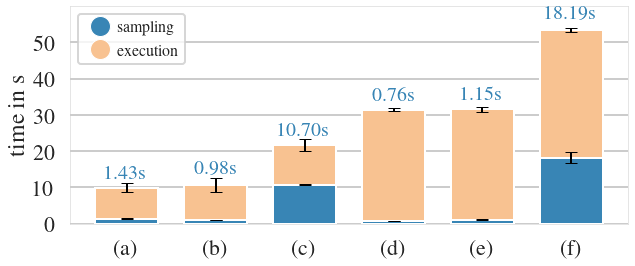

In [71]:
plt.figure(figsize=(10, 4))
w=0.7

sample_col = sns.color_palette()[0]
runtime_col = sns.color_palette()[-1]
plt.bar(np.arange(len(gdf)), gdf[('sampling_time', 'mean')], w, color=sample_col)
plt.bar(np.arange(len(gdf)), gdf[('job_time_excl_sampling', 'mean')], w, bottom=gdf[('sampling_time', 'mean')],
       color=runtime_col)

x_values = np.arange(len(gdf))
y_values = gdf[('sampling_time', 'mean')]
y_error = gdf[('sampling_time', 'std')]
plt.errorbar(x_values, y_values,  yerr=y_error,
             fmt='o', markersize=0, capsize=6, color='k', linewidth=2)

x_values = np.arange(len(gdf))
y_values = gdf[('sampling_time', 'mean')] + gdf[('job_time_excl_sampling', 'mean')]
y_error = gdf[('job_time_excl_sampling', 'std')]
plt.errorbar(x_values, y_values,  yerr=y_error,
             fmt='o', markersize=0, capsize=6, color='k', linewidth=2)

# plot sampling time on top of bars, b.c. they are so small
for x, y, value in zip(x_values, y_values, gdf[('sampling_time', 'mean')].values):
    plt.text(x, y + 4, '{:.2f}s'.format(value), va='center', fontsize=20, ha='center', color=sample_col)

plt.ylabel('time in s')
plt.grid(axis='x')
plt.ylim(0, 60)
plt.yticks(np.arange(0, 60, 10))
plt.xticks(np.arange(6), ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)'])

# https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html
hlabels=[('sampling', sample_col), ('execution', runtime_col),]
handles = []
for h in hlabels:
    handles.append(Line2D([0], [0], marker='o', color='w', label=h[0],
                        markerfacecolor=h[1], markersize=20))
plt.legend(handles=handles, fontsize=16, handletextpad=0.05)
plt.savefig('workshop_sampling.pdf', transparent=True, dpi=120, bbox_inches = 'tight', pad_inches = 0)
print('done')

What's the difference between the two ALL files?

 'SamplingMode.ALL_FILES|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)'
 
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)'

In [63]:
df

,sampling_mode,job_time,metrics,sampling_time,run,job_time_excl_sampling
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.474317,"{'logical_optimization_time_s': 0.0137463, 'll...",0.775935,4,30.698382
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,29.878893,"{'logical_optimization_time_s': 0.0224654, 'll...",1.150490,4,28.728403
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,8.316061,"{'logical_optimization_time_s': 0.0185247, 'll...",0.964578,4,7.351483
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,10.159707,"{'logical_optimization_time_s': 0.0394885, 'll...",1.418880,4,8.740827
4,SamplingMode.ALL_FILES|FIRST_ROWS,20.294357,"{'logical_optimization_time_s': 0.340269, 'llv...",10.620800,4,9.673557
5,SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS,52.301021,"{'logical_optimization_time_s': 0.60232, 'llvm...",17.458100,4,34.842921
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.456474,"{'logical_optimization_time_s': 0.0137409, 'll...",0.882812,5,30.573662
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,30.659847,"{'logical_optimization_time_s': 0.0223129, 'll...",1.137620,5,29.522227
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,16.809237,"{'logical_optimization_time_s': 0.0201565, 'll...",0.932661,5,15.876576
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,10.587621,"{'logical_optimization_time_s': 0.0394833, 'll...",1.456500,5,9.131121
